In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelBinarizer,OneHotEncoder
from scipy.stats import norm, skew
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [199]:
df = pd.read_csv('../Data/train.csv')

In [200]:
print('Shape of the dataset : ',df.shape)
df.head()

Shape of the dataset :  (15000, 44)


,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [201]:
dataset = df.drop(['ID'],1)
print('Shape of the dataset : ',dataset.shape)
dataset.head()
dataset.describe()

Shape of the dataset :  (15000, 43)


,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,33.490200,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867
std,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,49.540999,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252
min,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000
50%,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000
75%,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [202]:
#Check numerical and categorical features:

#Function that returns dataframe with only categorical features
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include='object').columns
    return dataset[cat_columns]
check_categorical(dataset)

,account_type,gender,loan_enq
0,current,M,Y
1,current,M,Y
2,current,M,Y
3,current,F,Y
4,current,M,Y
5,current,M,Y
6,current,M,Y
7,current,M,Y
8,current,F,Y
9,current,M,Y


In [203]:
#Function that returns dataframe with numerical features
def check_numerical(dataset):
    num_columns = dataset.select_dtypes(include=np.number).columns
    return dataset[num_columns]
check_numerical(dataset)

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,35,708,24893.000,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26.0,...,2.0,40.0,24563.00,30051.32,12761.00,2.0,65.0,50836.00,1674.09,20014.0
1,35,123,18941.620,966.00,20672.00,287.00,4217.000,885.00,1.0,7.0,...,2.0,78.0,23948.00,42119.05,76206.00,21.0,63.0,23226.00,13043.34,10173.0
2,55,802,5678.870,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32.0,...,2.0,82.0,10752.00,58373.25,75283.00,7.0,1.0,27036.00,25375.27,16095.0
3,29,867,30489.500,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1.0,...,23.0,38.0,12607.00,69851.51,68708.00,21.0,83.0,43037.00,3544.33,7707.0
4,34,802,7441.400,6906.04,4364.00,1939.00,2121.000,6829.18,67.0,47.0,...,24.0,50.0,25213.00,10071.00,80140.00,8.0,32.0,32044.00,12780.44,96408.0
5,27,958,2328.220,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7.0,...,43.0,2.0,21440.00,52292.68,199925.50,2.0,35.0,17284.00,5026.50,130263.0
6,32,805,1643.810,5009.13,8921.62,2151.00,6677.955,1185.00,10.0,2.0,...,2.0,25.0,20444.00,27354.56,200391.00,58.0,12.0,6779.00,1534.93,113479.0
7,28,448,5768.500,1963.00,84272.63,1956.00,6794.460,1225.00,26.0,1.0,...,1.0,63.0,5473.00,52411.93,7422.00,5.0,58.0,56900.00,14689.56,7463.0
8,67,631,721.000,2405.90,28933.37,5672.00,21473.000,1009.00,92.0,34.0,...,70.0,81.0,27418.00,59500.90,10425.53,2.0,79.0,12626.00,4583.09,5712.0
9,37,516,48575.240,4003.80,2112.49,2572.00,15782.520,5623.40,6.0,4.0,...,17.0,82.0,1145.00,285604.50,49972.50,2.0,63.0,18524.00,16839.22,7647.0


In [204]:
#Check for missing values
def missing_values(dataframe):
    percent_null = (dataframe.isnull().sum()/dataframe.shape[0])*100
    missing_data = pd.Series(percent_null,index=dataframe.columns)
    return missing_data
missing_values(dataset)


account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
cc_cons_apr              0.0
dc_cons_apr              0.0
cc_cons_may              0.0
dc_cons_may              0.0
cc_cons_jun              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
personal_loan_active     0.0
vehicle_loan_active      0.0
personal_loan_closed     0.0
vehicle_loan_closed      0.0
investment_1             0.0
investment_2             0.0
investment_3             0.0
investment_4             0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_may          0.0
max_credit_amo

In [205]:
dataset.loc[dataset['debit_amount_apr'] < dataset['cc_cons_apr']+dataset['dc_cons_apr'],'debit_amount_apr'] = dataset['cc_cons_apr']+dataset['dc_cons_apr']
dataset.loc[dataset['debit_amount_apr'] < dataset['cc_cons_apr']+dataset['dc_cons_apr'],'debit_amount_apr']

Series([], Name: debit_amount_apr, dtype: float64)

In [206]:
dataset.loc[dataset['debit_amount_may'] < dataset['cc_cons_may']+dataset['dc_cons_may'],'debit_amount_may'] = dataset['cc_cons_may']+dataset['dc_cons_may']
dataset.loc[dataset['debit_amount_may'] < dataset['cc_cons_may']+dataset['dc_cons_may'],'debit_amount_may']

Series([], Name: debit_amount_may, dtype: float64)

In [207]:
dataset.loc[dataset['debit_amount_jun'] < dataset['cc_cons_jun']+dataset['dc_cons_jun'],'debit_amount_jun'] = dataset['cc_cons_jun']+dataset['dc_cons_jun']
dataset.loc[dataset['debit_amount_jun'] < dataset['cc_cons_jun']+dataset['dc_cons_jun'],'debit_amount_jun']

Series([], Name: debit_amount_jun, dtype: float64)

In [208]:
dataset.loc[dataset['credit_amount_apr'] > dataset['max_credit_amount_apr'],'credit_amount_apr'] = dataset['max_credit_amount_apr']
dataset[['credit_amount_apr','max_credit_amount_apr']]

,credit_amount_apr,max_credit_amount_apr
0,25192.00,25296.00
1,80750.00,80750.00
2,38466.00,38466.00
3,52732.00,52732.00
4,19613.00,19613.00
5,18433.00,18433.00
6,18825.00,19157.00
7,58876.00,58876.00
8,10887.00,10887.00
9,14864.78,71395.00


In [209]:
dataset.loc[dataset['credit_amount_may'] > dataset['max_credit_amount_may'],'credit_amount_may'] = dataset['max_credit_amount_may']
dataset[['credit_amount_may','max_credit_amount_may']]

,credit_amount_may,max_credit_amount_may
0,24563.00,24563.00
1,23948.00,23948.00
2,10752.00,10752.00
3,12607.00,12607.00
4,25213.00,25213.00
5,19584.00,21440.00
6,20444.00,20444.00
7,5473.00,5473.00
8,27418.00,27418.00
9,1145.00,1145.00


In [210]:
dataset.loc[dataset['credit_amount_jun'] > dataset['max_credit_amount_jun'],'credit_amount_jun'] = dataset['max_credit_amount_jun']
dataset[['credit_amount_jun','max_credit_amount_jun']]

,credit_amount_jun,max_credit_amount_jun
0,12761.00,50836.00
1,23226.00,23226.00
2,27036.00,27036.00
3,43037.00,43037.00
4,32044.00,32044.00
5,17284.00,17284.00
6,6779.00,6779.00
7,7422.00,56900.00
8,10425.53,12626.00
9,18524.00,18524.00


In [211]:
def check_outliers(dataframe):
    outliers = pd.DataFrame(columns=['Features','Outliers'])
    for col in dataframe.columns:
        if col in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[col].quantile(0.25)
            q3 = dataframe[col].quantile(0.75)
            iqr = q3-q1
            lower_fence = q1-(1.5*iqr)
            higher_fence = q3+(1.5*iqr)
            
            outliers = outliers.append({'Features':col,'Outliers':dataframe.loc[(dataframe[col] < lower_fence) | (dataframe[col] > higher_fence)].shape[0]},ignore_index=True)
    return(outliers.sort_values(by='Outliers',ascending=False))
check_outliers(dataset)                                        

,Features,Outliers
39,cc_cons,3134
30,credit_count_may,2655
35,credit_count_jun,2217
19,investment_1,2123
21,investment_3,1554
38,emi_active,1393
37,max_credit_amount_jun,1385
27,max_credit_amount_apr,1376
7,dc_cons_jun,1366
32,max_credit_amount_may,1300


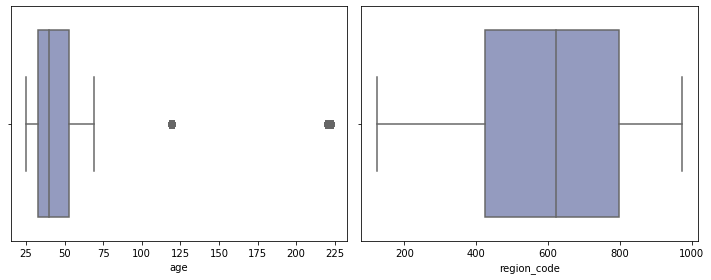

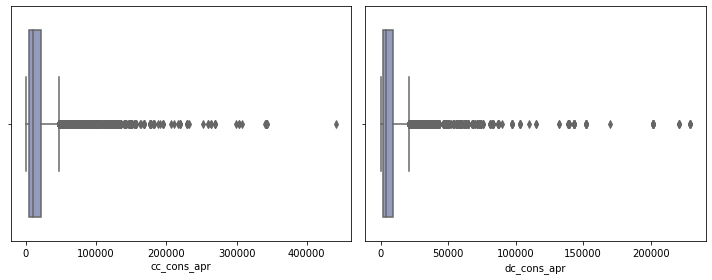

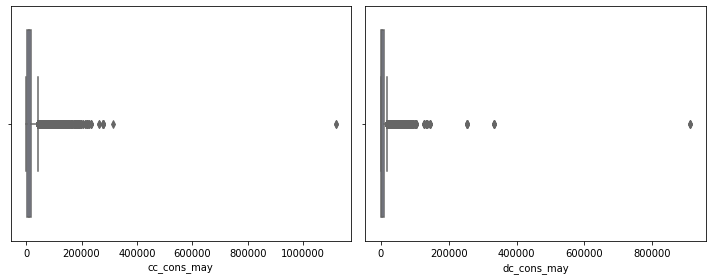

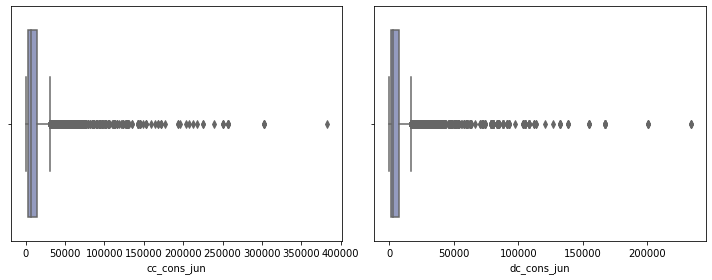

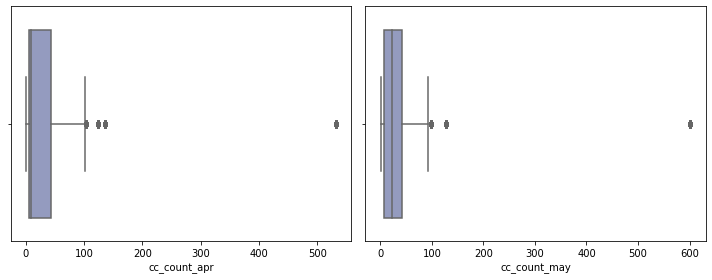

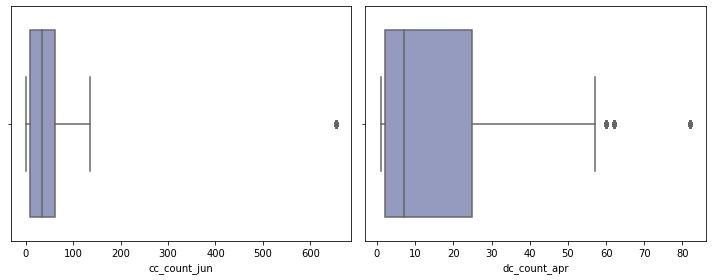

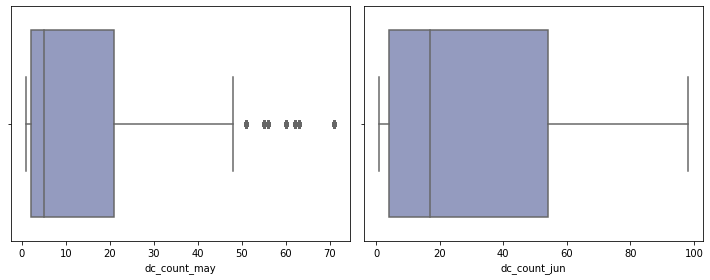

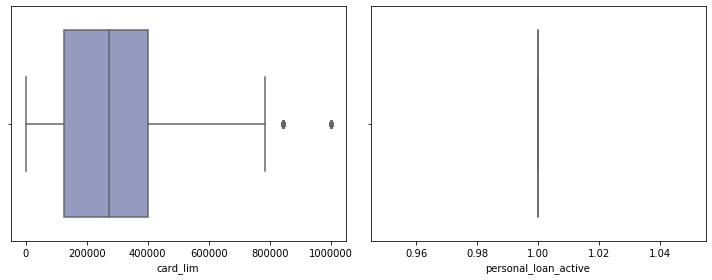

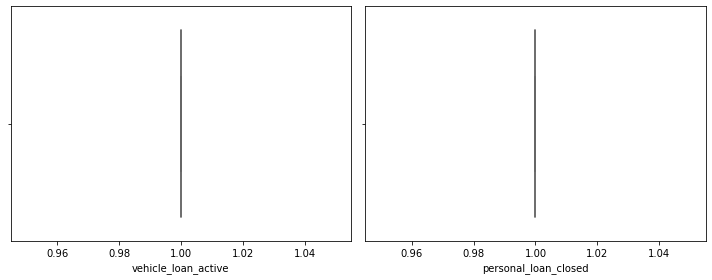

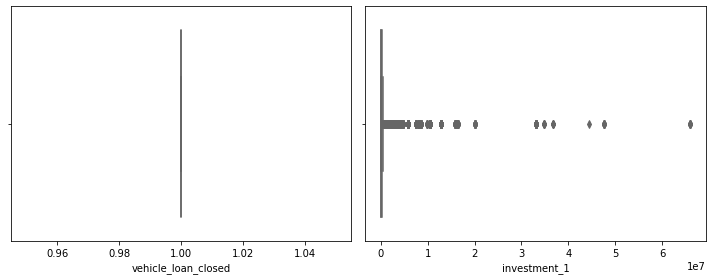

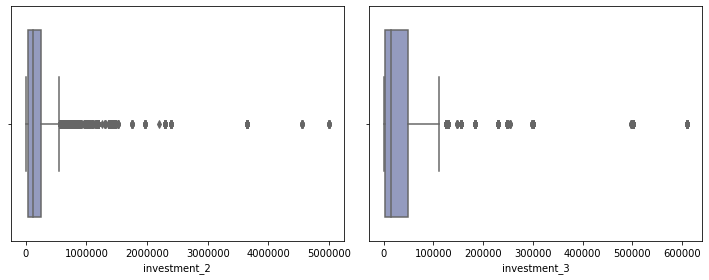

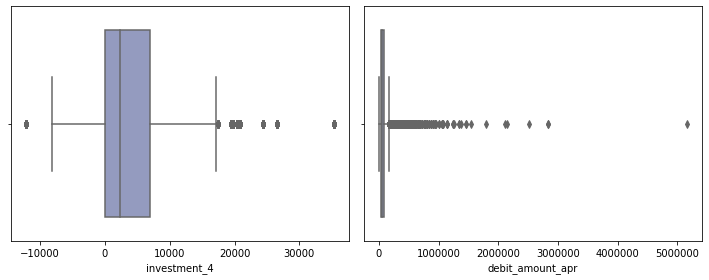

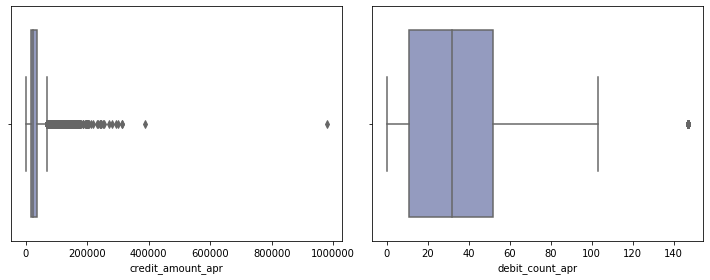

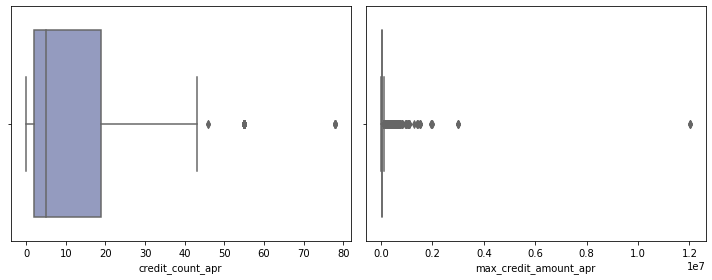

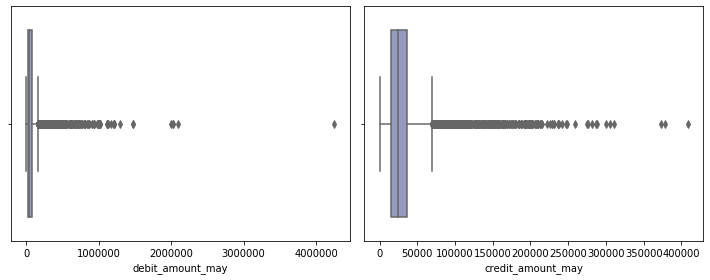

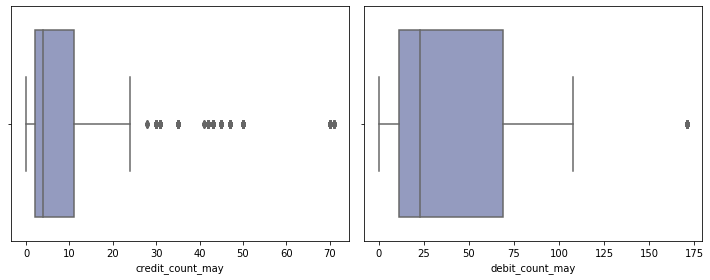

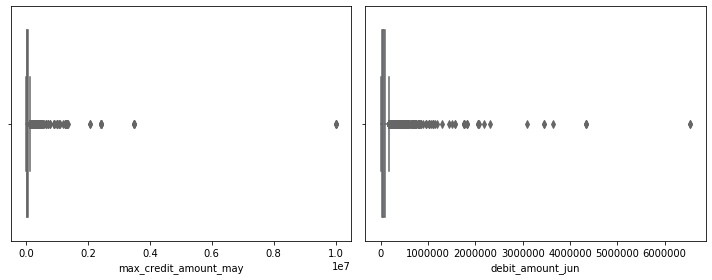

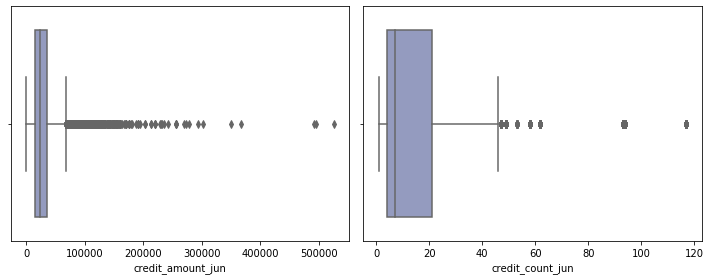

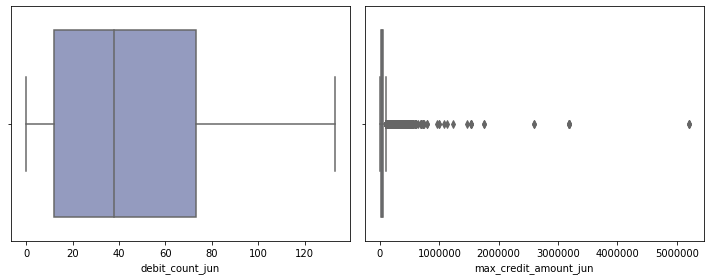

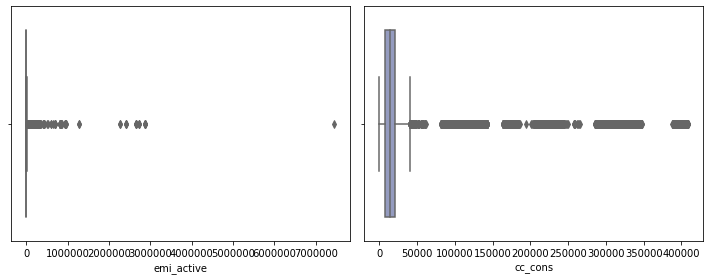

In [212]:
def plot_boxplots(dataset):
    numerical_df = check_numerical(dataset)
    numerical_columns = numerical_df.columns.tolist()
    for i in range(0,len(numerical_columns),2):
        if len(numerical_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataset[numerical_columns[i]],palette='BuPu_r')
            plt.subplot(122)            
            sns.boxplot(dataset[numerical_columns[i+1]],palette='BuPu_r')
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataset[numerical_columns[i]],palette='BuPu_r')
plot_boxplots(dataset)

Empty DataFrame
Columns: [account_type, gender, age, region_code, cc_cons_apr, dc_cons_apr, cc_cons_may, dc_cons_may, cc_cons_jun, dc_cons_jun, cc_count_apr, cc_count_may, cc_count_jun, dc_count_apr, dc_count_may, dc_count_jun, card_lim, personal_loan_active, vehicle_loan_active, personal_loan_closed, vehicle_loan_closed, investment_1, investment_2, investment_3, investment_4, debit_amount_apr, credit_amount_apr, debit_count_apr, credit_count_apr, max_credit_amount_apr, debit_amount_may, credit_amount_may, credit_count_may, debit_count_may, max_credit_amount_may, debit_amount_jun, credit_amount_jun, credit_count_jun, debit_count_jun, max_credit_amount_jun, loan_enq, emi_active, cc_cons]
Index: []

[0 rows x 43 columns]


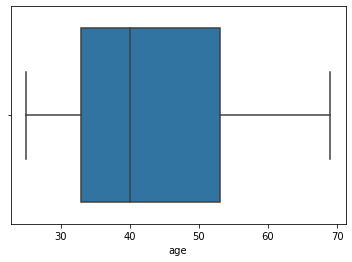

In [214]:
#Handling outliers in age

# median_age = dataset['age'].median()
dataset['age'] = np.where(dataset['age'] >75, 75,dataset['age'])
sns.boxplot(dataset['age'])
print(dataset.loc[dataset['age']>75])

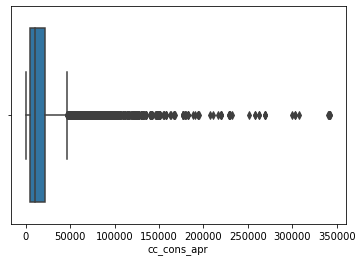

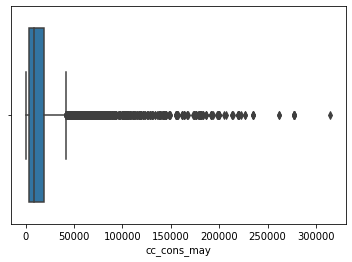

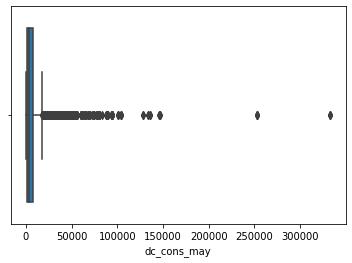

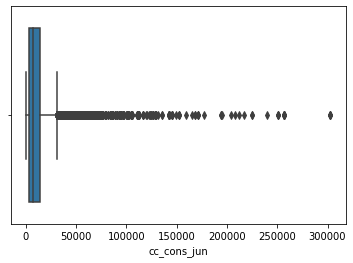

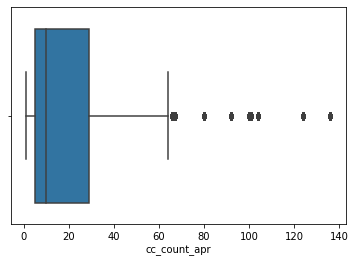

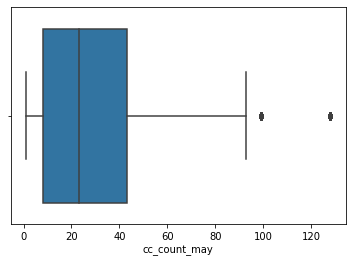

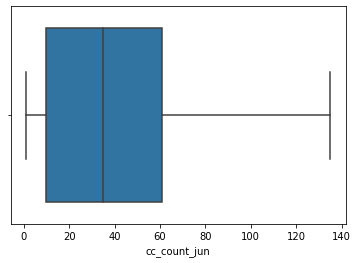

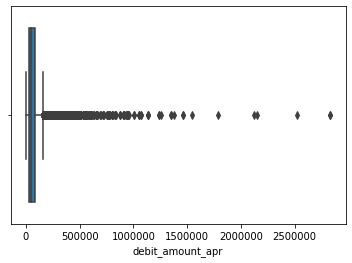

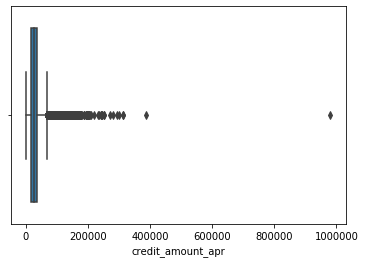

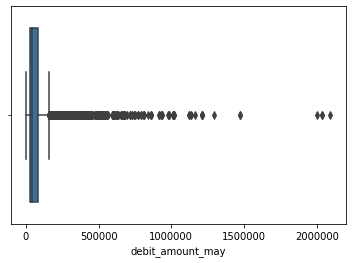

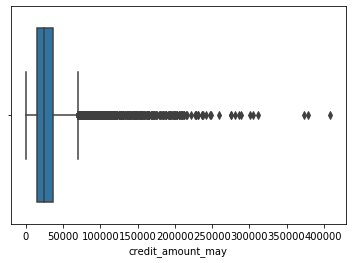

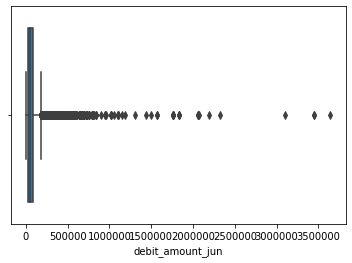

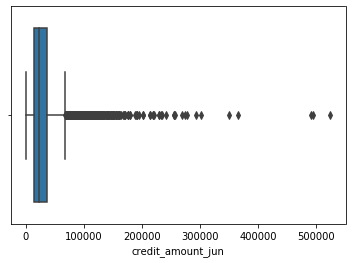

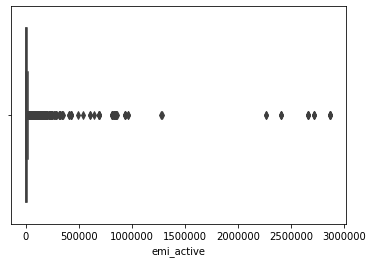

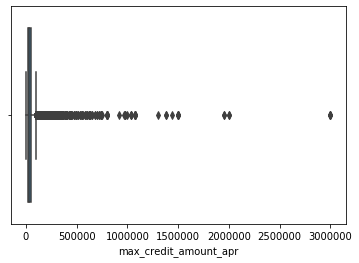

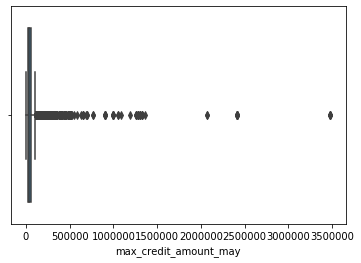

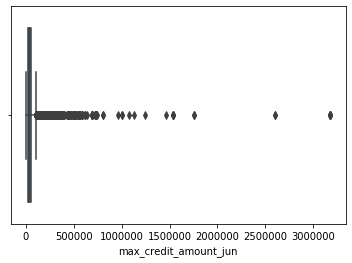

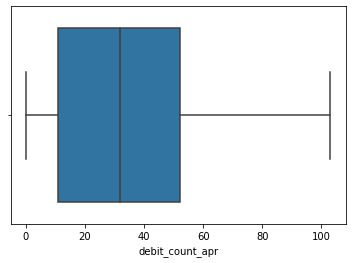

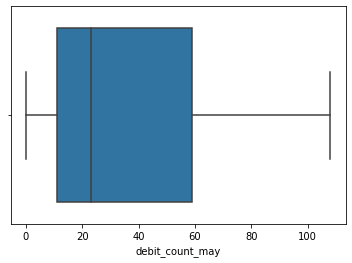

In [215]:
#Handling outliers in cc_cons_apr, cc_cons_may, dc_cons_may, cc_cons_jun, investment_2, debit_amount_apr,debit_amount_may,debit_amount_jun
# credit_amount_jun,max_credit_amount_jun, emi_active beyond the range of 3500000

def handle_outliers(list_of_columns,value):
    for col in list_of_columns:
        median_col = dataset[col].median()
        dataset[col] = np.where(dataset[col] >value, median_col,dataset[col])
        sns.boxplot(dataset[col])
        plt.show()

credit_debit_card_amount = ['cc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun']
amount = 350000

credit_debit_card_transactions = ['cc_count_apr','cc_count_may','cc_count_jun']
transactions = 200

total_credit_debit_amount = ['debit_amount_apr','credit_amount_apr','debit_amount_may','credit_amount_may','debit_amount_jun','credit_amount_jun','emi_active','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']
total_amount = 4000000

total_debit_transactions = ['debit_count_apr','debit_count_may']
total_transactions = 120

handle_outliers(credit_debit_card_amount,350000)
handle_outliers(credit_debit_card_transactions,transactions)
handle_outliers(total_credit_debit_amount,total_amount)
handle_outliers(total_debit_transactions,total_transactions)

In [216]:
check_outliers(dataset)

,Features,Outliers
39,cc_cons,3134
30,credit_count_may,2655
35,credit_count_jun,2217
19,investment_1,2123
21,investment_3,1554
38,emi_active,1392
37,max_credit_amount_jun,1383
27,max_credit_amount_apr,1373
7,dc_cons_jun,1366
32,max_credit_amount_may,1311


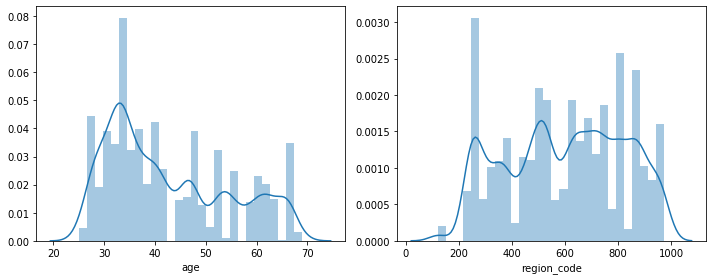

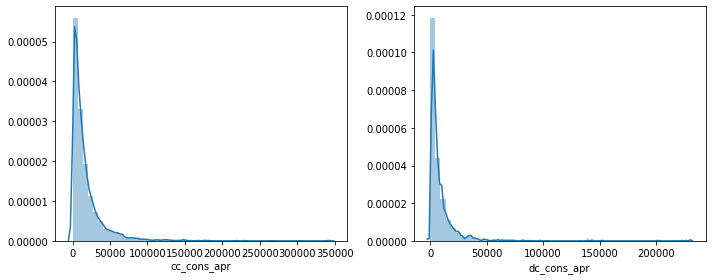

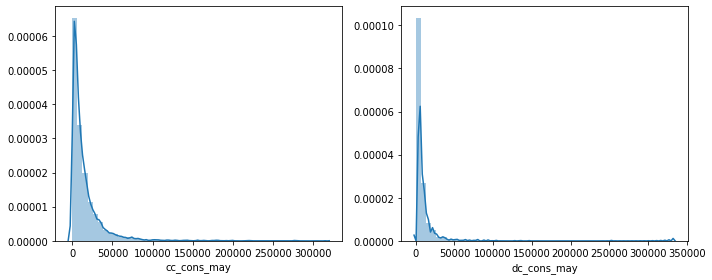

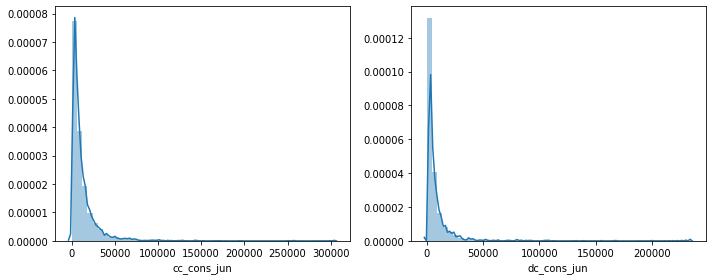

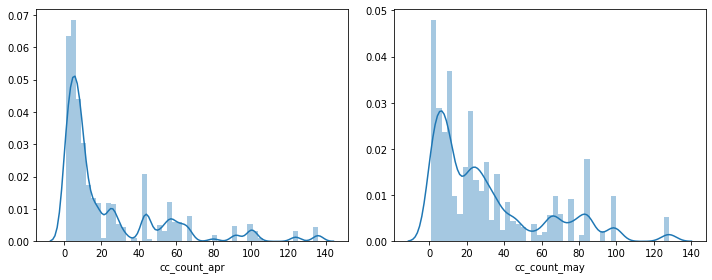

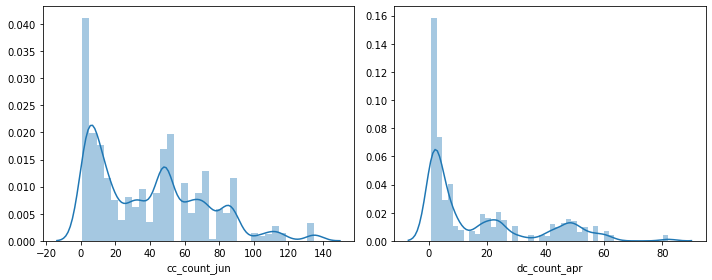

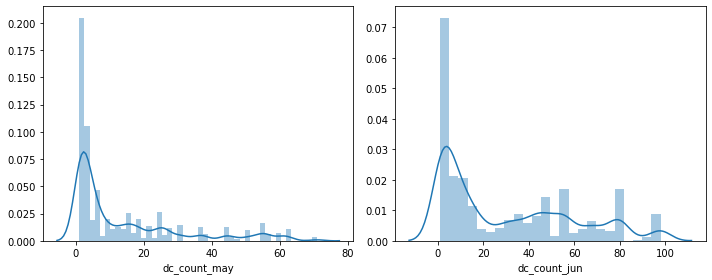

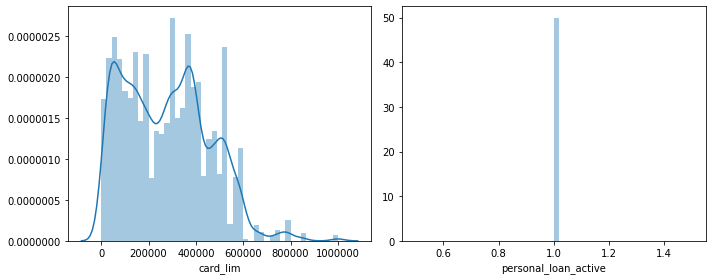

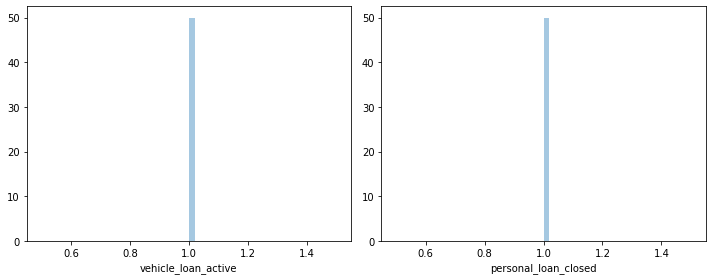

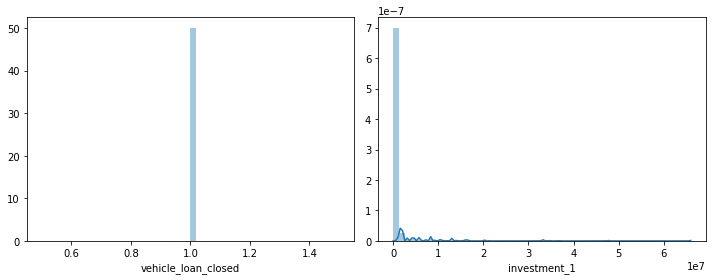

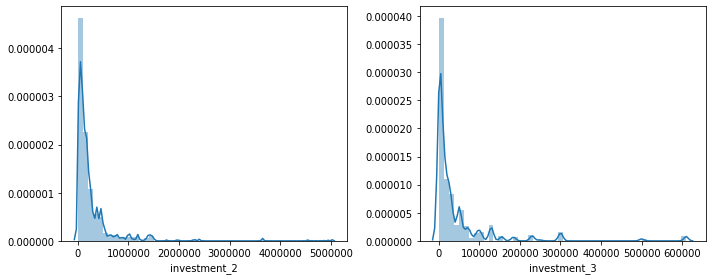

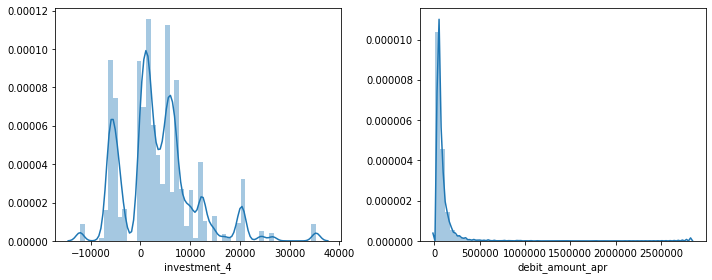

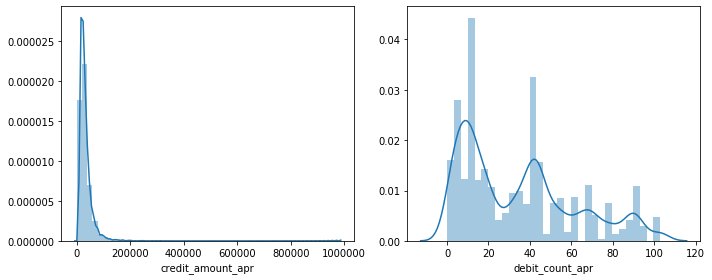

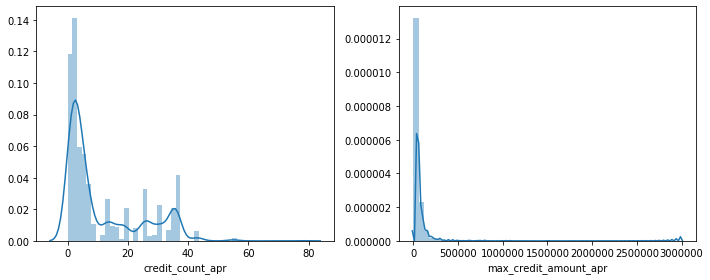

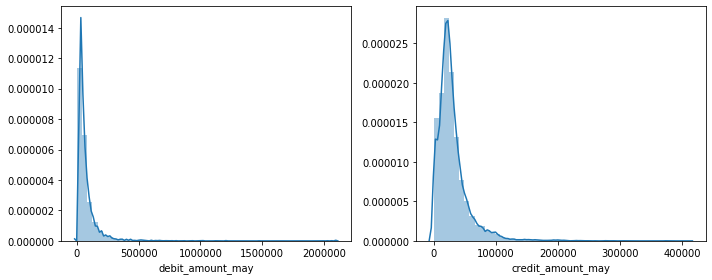

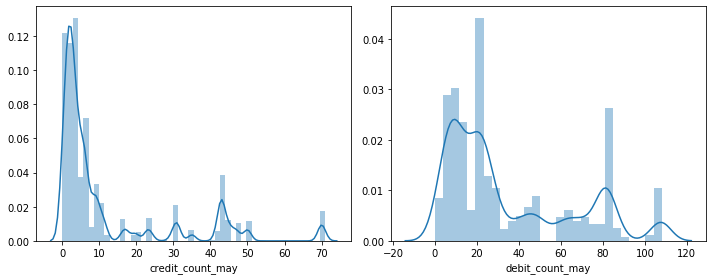

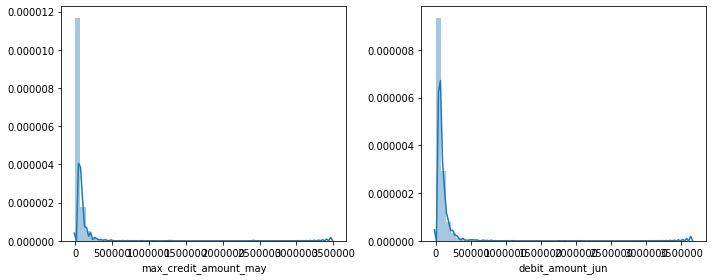

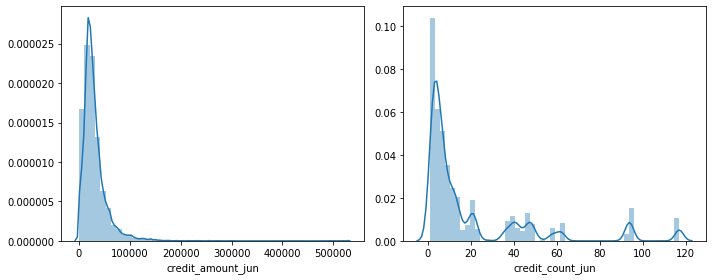

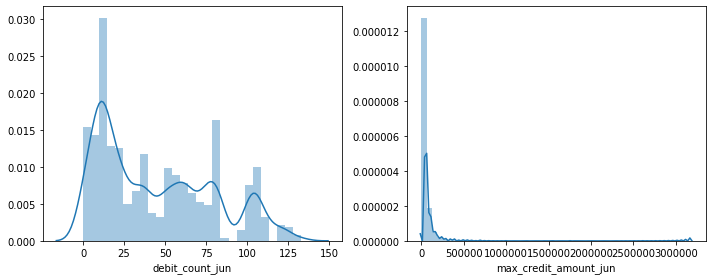

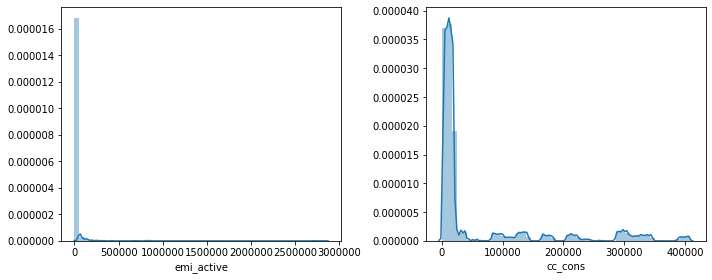

In [217]:
def plot_distplots(dataset):
    numerical_df = check_numerical(dataset)
    numerical_columns = numerical_df.columns.tolist()
    for i in range(0,len(numerical_columns),2):
        if len(numerical_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataset[numerical_columns[i]])
            plt.subplot(122)            
            sns.distplot(dataset[numerical_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataset[numerical_columns[i]])
plot_distplots(dataset)

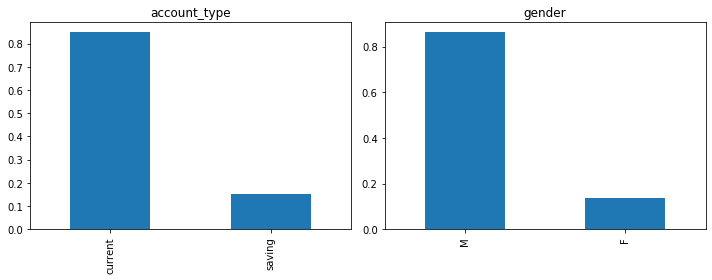

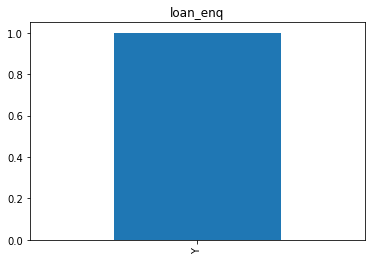

In [218]:
#Univariate anaylsis of categorical columns:
def plot_barplots(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
plot_barplots(dataset)

In [219]:
# We see that the columns personal_loan_active, vehicle_loan_active,personal_loan_closed,vehicle_loan_closed have
# 0 variance and hence can be dropped as technically they will have no help in prediction
#Similarly, loan_enq has no variance and can be dropped

dataset_without_zerovariance_cols = dataset.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'],axis=1)

In [220]:
#Since Investment_4 column has negative values, we will add a constant term = 1-min(investment_4) to set all values to
# positive before applying sqrt transform to reduce skewness. 

min_investment_val = np.min(dataset_without_zerovariance_cols['investment_4'])
dataset_without_zerovariance_cols['investment_4'] = dataset_without_zerovariance_cols['investment_4'] + 1 - min_investment_val

In [221]:
def check_skewness(dataset):
    numerical_df = check_numerical(dataset)
    for i in numerical_df.columns:
        print(i,numerical_df[i].skew())
check_skewness(dataset_without_zerovariance_cols)

age 0.5943010987867711
region_code -0.11836461735918884
cc_cons_apr 4.6568167663175135
dc_cons_apr 7.135573596226462
cc_cons_may 4.491870180125756
dc_cons_may 9.350017742897657
cc_cons_jun 5.807083150022853
dc_cons_jun 6.569554277922997
cc_count_apr 1.8873614473413736
cc_count_may 1.2230837762045348
cc_count_jun 0.6821651023611095
dc_count_apr 1.1026976801033637
dc_count_may 1.5262999274296147
dc_count_jun 0.7328765665670188
card_lim 0.44256937383628975
investment_1 11.603970737033642
investment_2 5.475357956378218
investment_3 4.075013228700861
investment_4 1.084491550176809
debit_amount_apr 8.690644981893508
credit_amount_apr 6.326194391466875
debit_count_apr 0.7130094477938087
credit_count_apr 1.1617243732374019
max_credit_amount_apr 13.937413254475121
debit_amount_may 6.725481507710666
credit_amount_may 3.269588863343009
credit_count_may 1.8339145871744627
debit_count_may 0.9235604428287827
max_credit_amount_may 15.957373639708383
debit_amount_jun 11.387235525193356
credit_amount_j

In [222]:
def remove_skewness(dataset):
#     dataset = dataset.drop('cc_cons',1)
    numerical_df = check_numerical(dataset)
    for i in numerical_df.columns:
        if numerical_df[i].skew()>1:
            numerical_df[i] = np.sqrt(numerical_df[i])
    return numerical_df
transformed_dataset = remove_skewness(dataset_without_zerovariance_cols)
check_skewness(transformed_dataset)

age 0.5943010987867711
region_code -0.11836461735918884
cc_cons_apr 1.6055142778537943
dc_cons_apr 2.207385439453815
cc_cons_may 1.7124926751930791
dc_cons_may 2.404804199689171
cc_cons_jun 1.8565625074518453
dc_cons_jun 2.317558076278825
cc_count_apr 1.018698773191525
cc_count_may 0.4838955918958488
cc_count_jun 0.6821651023611095
dc_count_apr 0.5927875531211798
dc_count_may 0.8843736294055733
dc_count_jun 0.7328765665670188
card_lim 0.44256937383628975
investment_1 4.713770592294589
investment_2 1.7840303905846813
investment_3 1.8330911821542422
investment_4 -0.17707066138449168
debit_amount_apr 2.5623998594798554
credit_amount_apr 0.7658825079758474
debit_count_apr 0.7130094477938087
credit_count_apr 0.5865943051692282
max_credit_amount_apr 3.649323008674975
debit_amount_may 2.26986903232447
credit_amount_may 0.7089644485320529
credit_count_may 1.1550222439811997
debit_count_may 0.9235604428287827
max_credit_amount_may 3.8312404082401654
debit_amount_jun 2.8287783117407366
credit_am

In [223]:
transformed_dataset

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,35.0,708,157.775156,19.442222,101.429779,172.232401,127.637769,106.920531,1.414214,5.099020,...,1.414214,40.0,156.725875,173.353166,112.964596,1.414214,65.0,225.468401,40.915645,141.470845
1,35.0,123,137.628558,31.080541,143.777606,16.941074,64.938432,29.748950,1.000000,2.645751,...,1.414214,78.0,154.751414,205.229262,152.400787,4.582576,63.0,152.400787,114.207443,100.861291
2,55.0,802,75.358278,52.191953,44.322680,62.714512,154.778067,71.888803,6.557439,5.656854,...,1.414214,82.0,103.691851,241.605567,164.426275,2.645751,1.0,164.426275,159.296171,126.866071
3,29.0,867,174.612428,35.156792,112.293722,95.593619,132.366914,116.834498,7.280110,1.000000,...,4.795832,38.0,112.280898,264.294362,207.453609,4.582576,83.0,207.453609,59.534276,87.789521
4,34.0,802,86.263550,83.102587,66.060578,44.034078,46.054316,82.638853,8.185353,6.855655,...,4.898979,50.0,158.786020,100.354372,179.008380,2.828427,32.0,179.008380,113.050608,310.496377
5,27.0,958,48.251632,39.969238,141.349744,32.339604,108.102983,25.059928,2.449490,2.645751,...,6.557439,2.0,146.424042,228.675928,131.468627,1.414214,35.0,131.468627,70.897814,360.919659
6,32.0,805,40.543927,70.775208,94.454328,46.378875,81.718755,34.423829,3.162278,1.414214,...,1.414214,25.0,142.982516,165.392140,82.334683,7.615773,12.0,82.334683,39.178183,336.866442
7,28.0,448,75.950642,44.305756,290.297485,44.226689,82.428514,35.000000,5.099020,1.000000,...,1.000000,63.0,73.979727,228.936520,86.151030,2.236068,58.0,238.537209,121.200495,86.388657
8,67.0,631,26.851443,49.049975,170.098119,75.312682,146.536685,31.764760,9.591663,5.830952,...,8.366600,81.0,165.583816,243.928063,102.105485,1.414214,79.0,112.365475,67.698523,75.577775
9,37.0,516,220.397913,63.275588,45.961832,50.714889,125.628500,74.989333,2.449490,2.000000,...,4.123106,82.0,33.837849,534.419779,136.102902,1.414214,63.0,136.102902,129.766020,87.447127


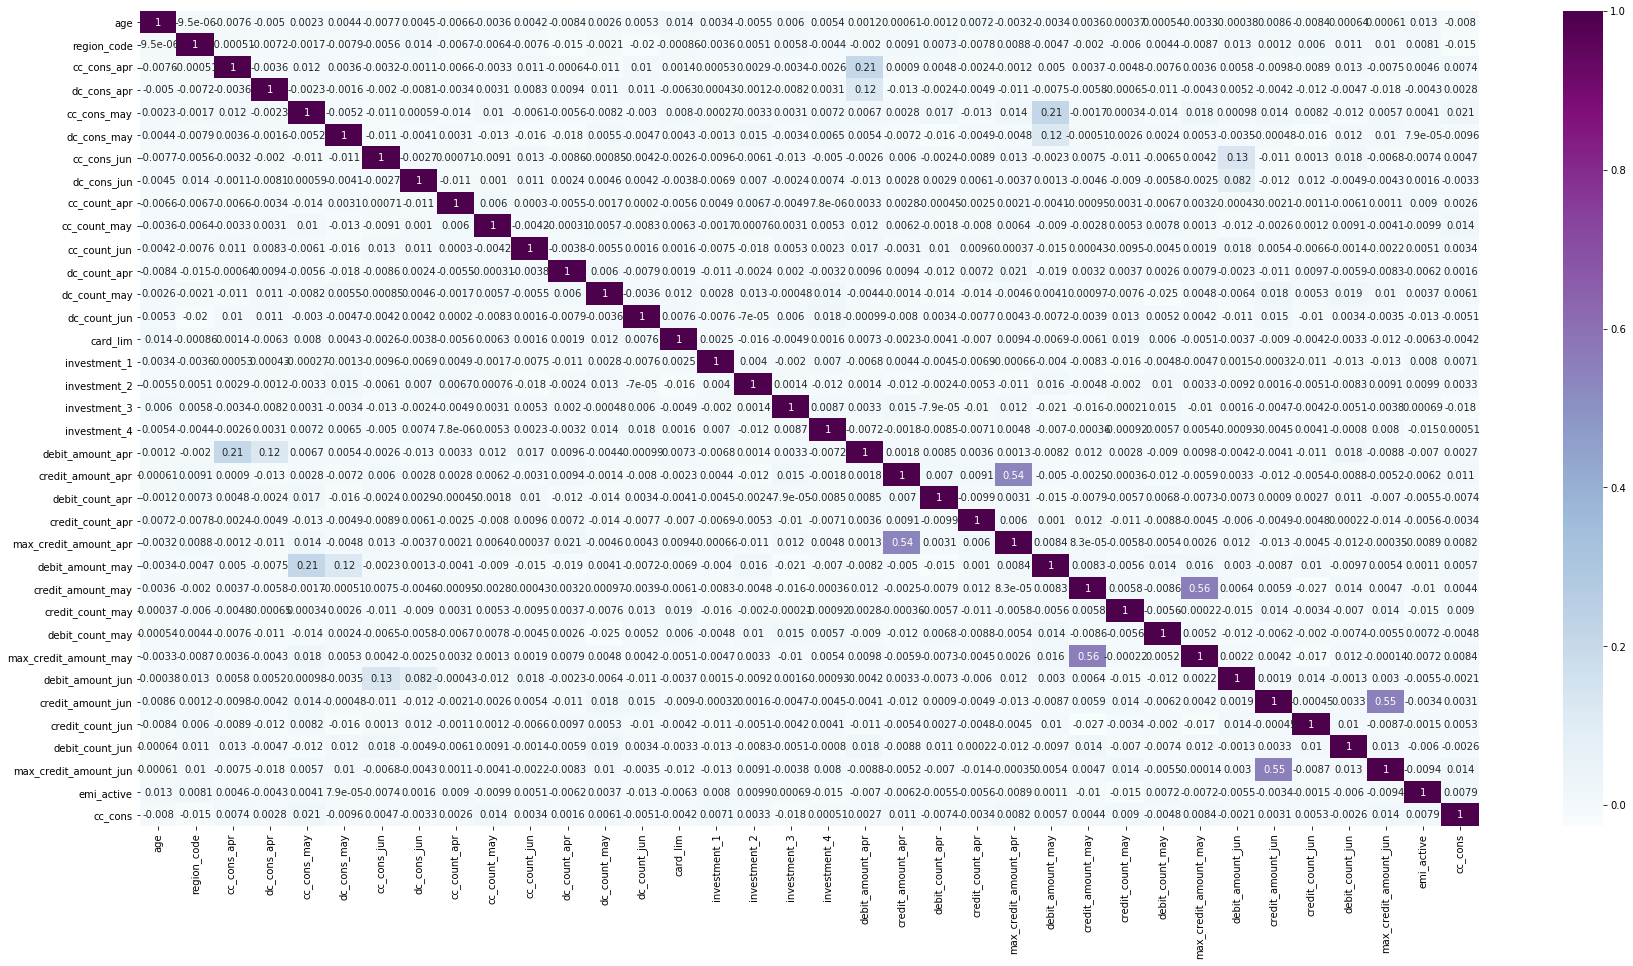

In [225]:
dataset_corr = transformed_dataset.corr()
plt.figure(figsize=(30,15))
sns.heatmap(dataset_corr,annot=True,cmap='BuPu')

<Figure size 1080x360 with 0 Axes>

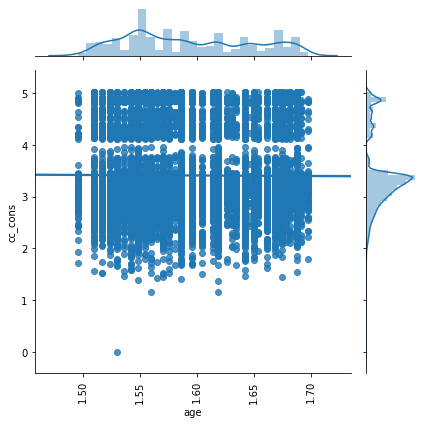

<Figure size 1080x360 with 0 Axes>

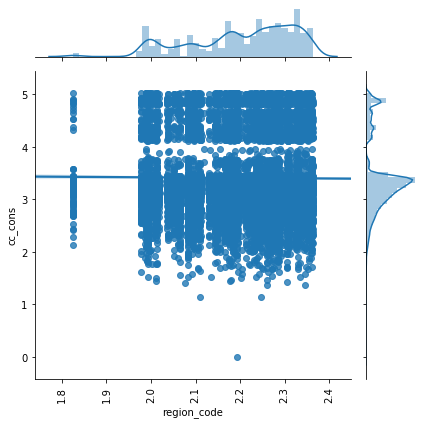

<Figure size 1080x360 with 0 Axes>

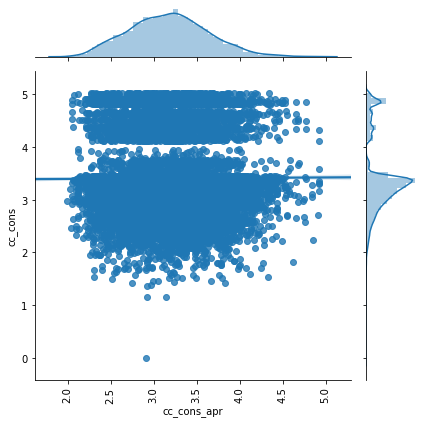

<Figure size 1080x360 with 0 Axes>

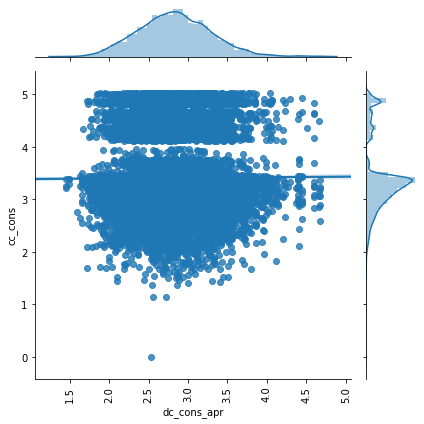

<Figure size 1080x360 with 0 Axes>

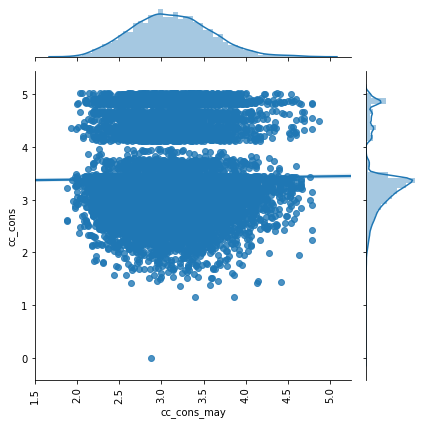

<Figure size 1080x360 with 0 Axes>

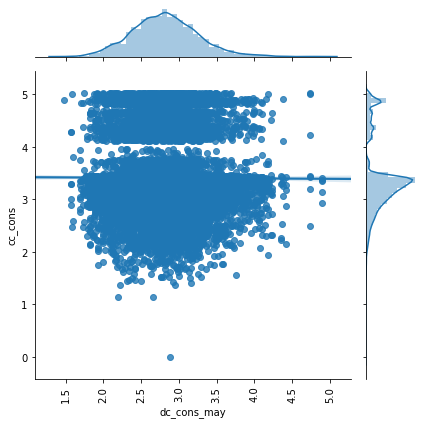

<Figure size 1080x360 with 0 Axes>

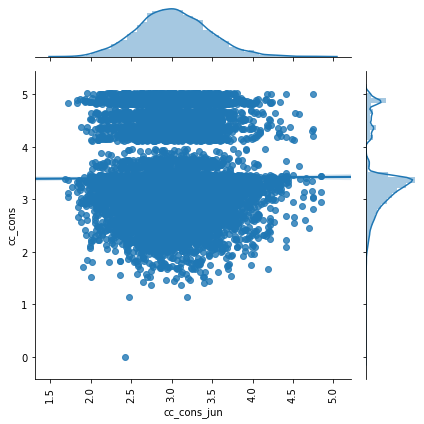

<Figure size 1080x360 with 0 Axes>

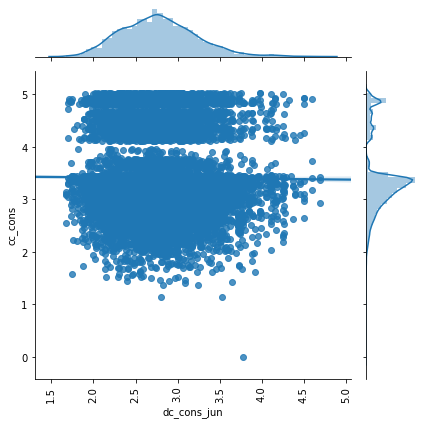

<Figure size 1080x360 with 0 Axes>

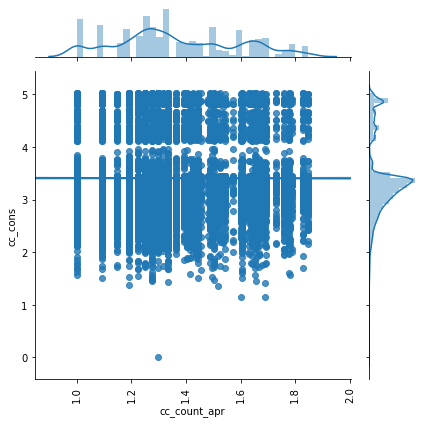

<Figure size 1080x360 with 0 Axes>

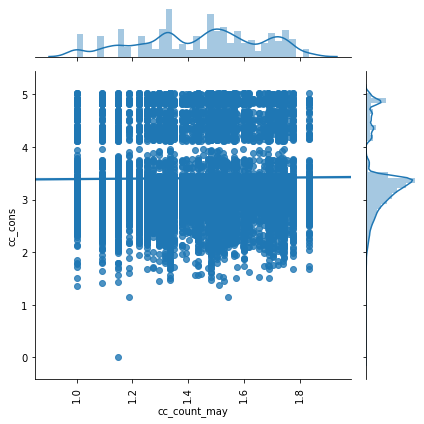

<Figure size 1080x360 with 0 Axes>

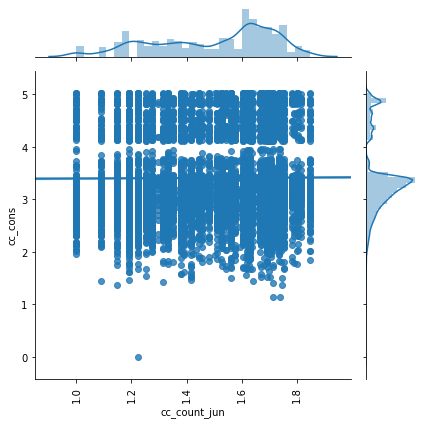

<Figure size 1080x360 with 0 Axes>

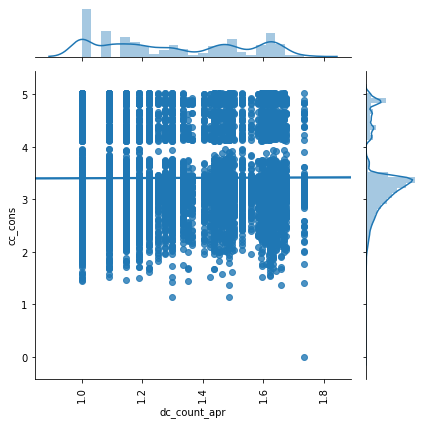

<Figure size 1080x360 with 0 Axes>

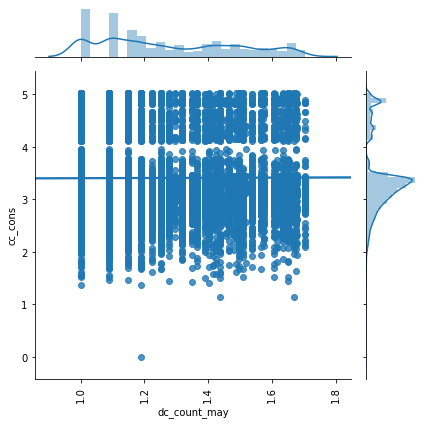

<Figure size 1080x360 with 0 Axes>

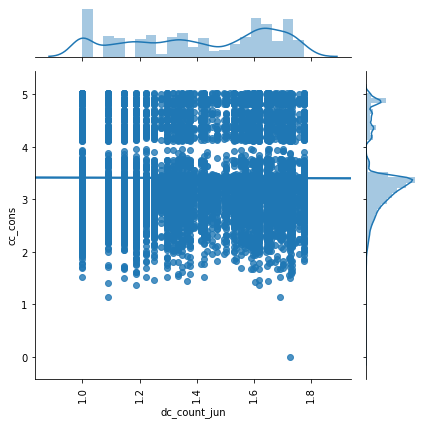

<Figure size 1080x360 with 0 Axes>

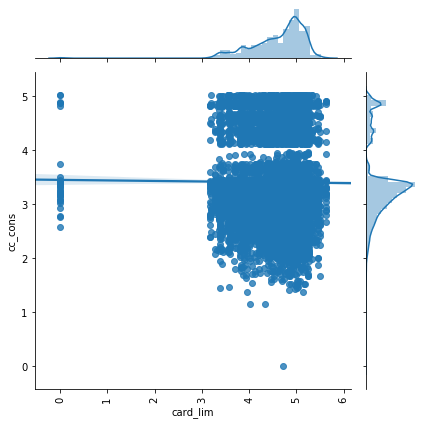

<Figure size 1080x360 with 0 Axes>

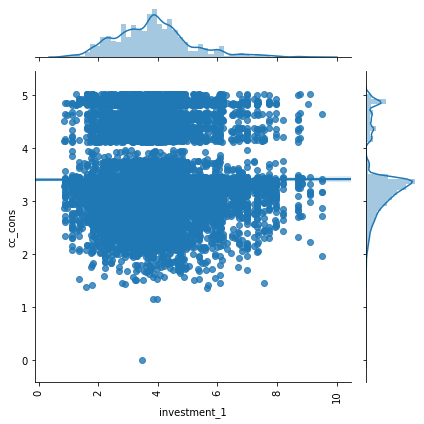

<Figure size 1080x360 with 0 Axes>

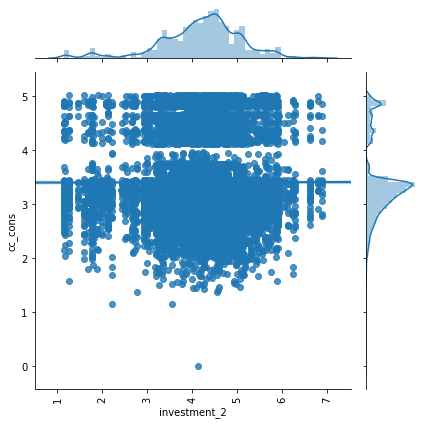

<Figure size 1080x360 with 0 Axes>

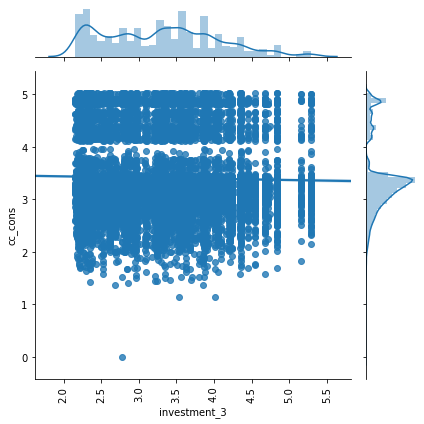

<Figure size 1080x360 with 0 Axes>

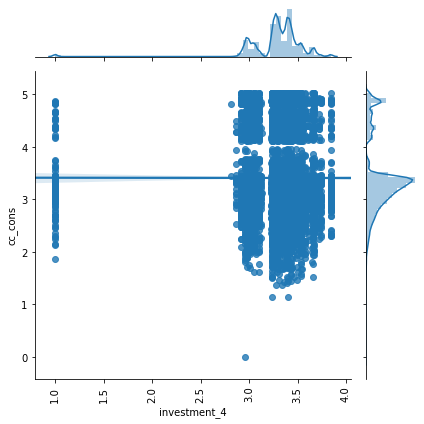

<Figure size 1080x360 with 0 Axes>

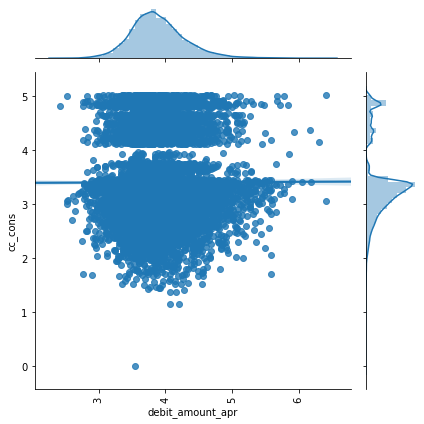

<Figure size 1080x360 with 0 Axes>

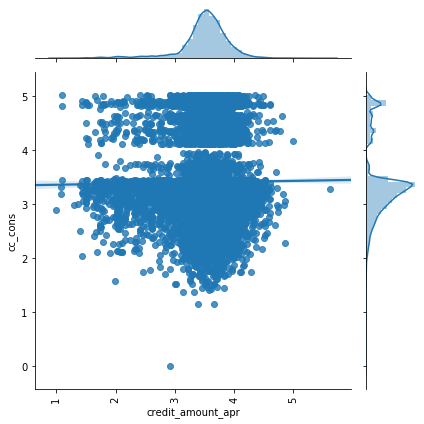

<Figure size 1080x360 with 0 Axes>

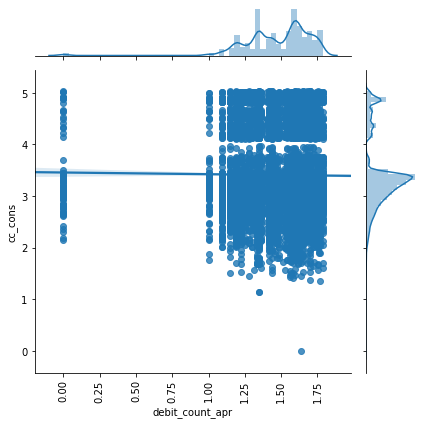

<Figure size 1080x360 with 0 Axes>

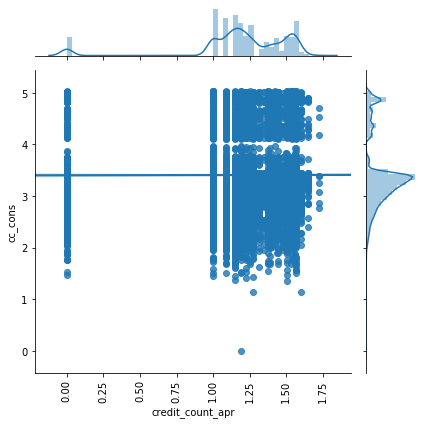

<Figure size 1080x360 with 0 Axes>

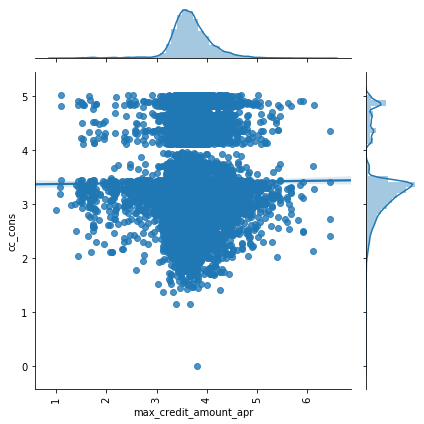

<Figure size 1080x360 with 0 Axes>

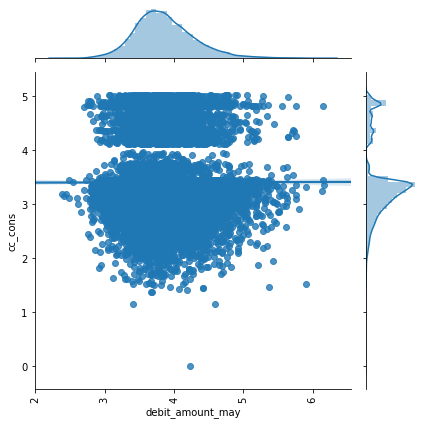

<Figure size 1080x360 with 0 Axes>

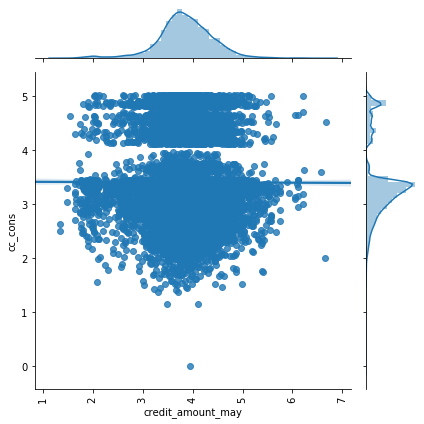

<Figure size 1080x360 with 0 Axes>

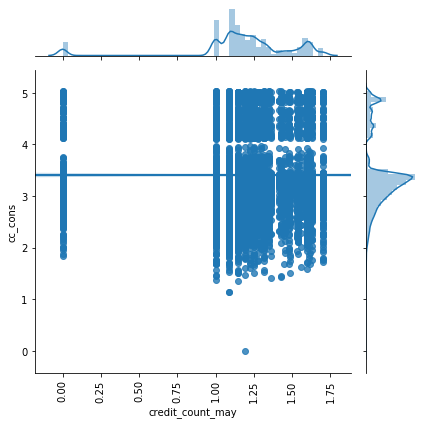

<Figure size 1080x360 with 0 Axes>

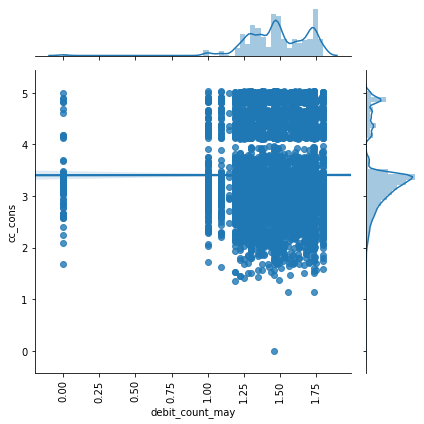

<Figure size 1080x360 with 0 Axes>

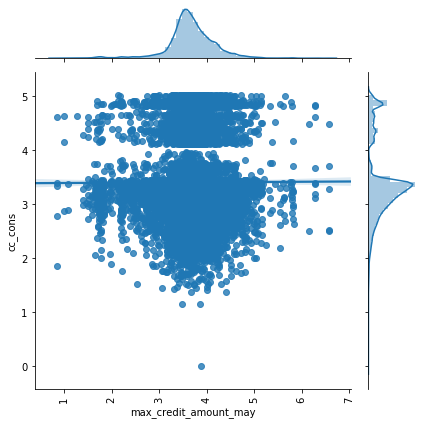

<Figure size 1080x360 with 0 Axes>

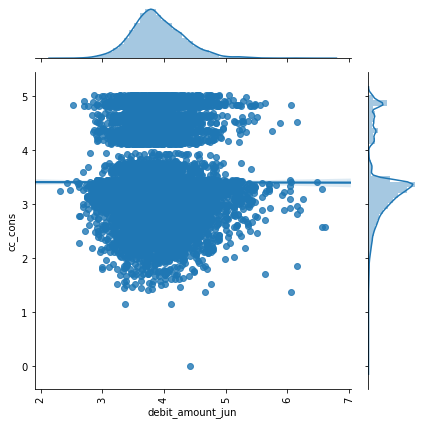

<Figure size 1080x360 with 0 Axes>

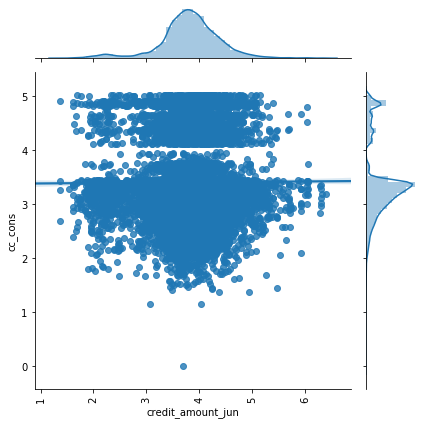

<Figure size 1080x360 with 0 Axes>

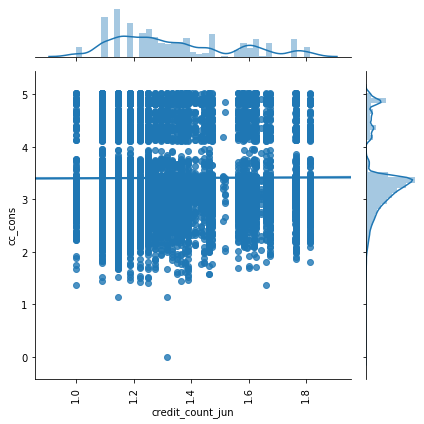

<Figure size 1080x360 with 0 Axes>

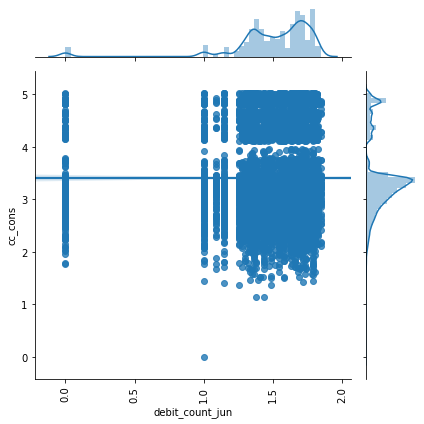

<Figure size 1080x360 with 0 Axes>

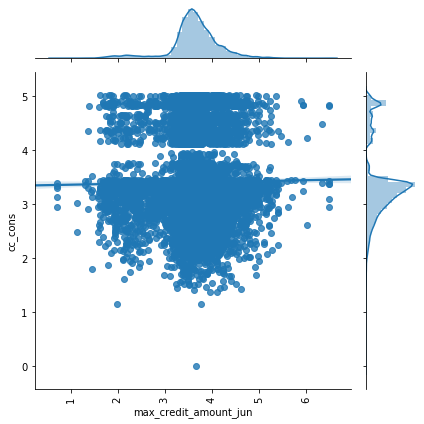

<Figure size 1080x360 with 0 Axes>

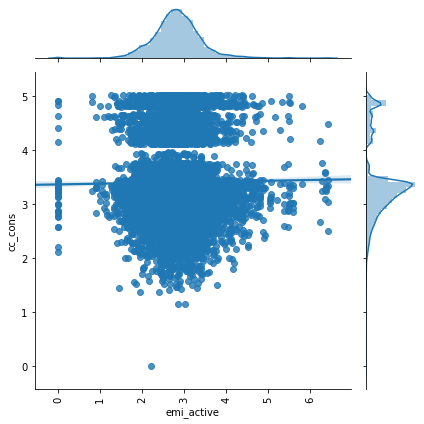

In [171]:
def bivariate_analysis_numerical(dataframe):
    numerical_columns = dataframe.drop('cc_cons',1).columns
    for i in numerical_columns:
        plt.figure(figsize=(15,5))
        sns.jointplot(x=dataframe[i],y=dataframe['cc_cons'],kind='reg')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


bivariate_analysis_numerical(transformed_dataset)

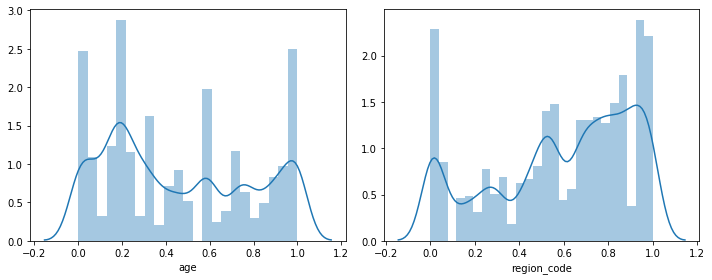

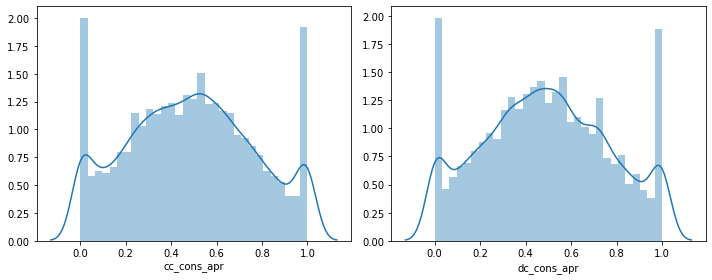

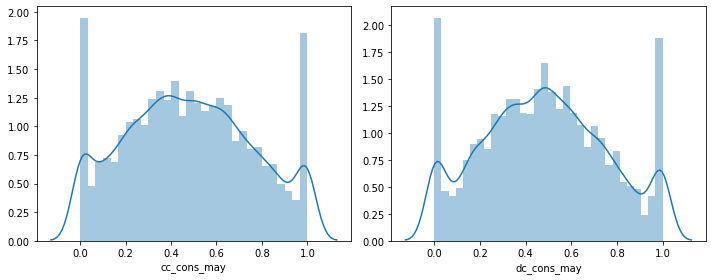

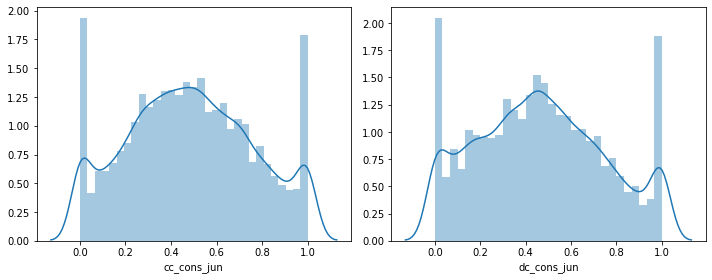

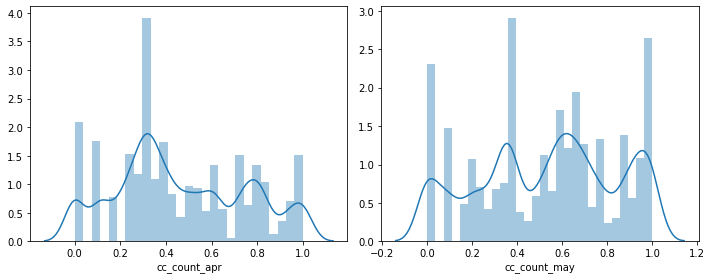

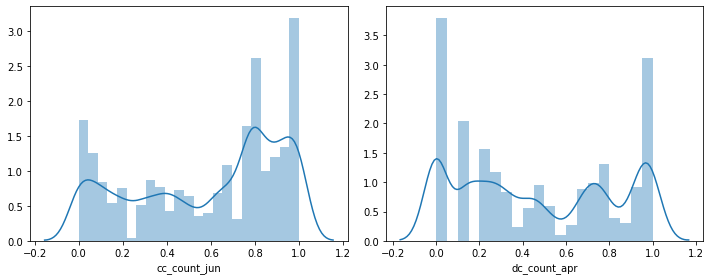

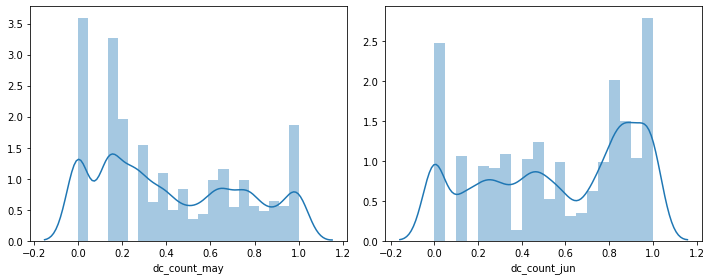

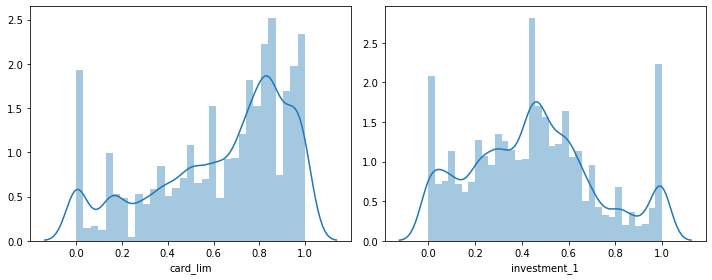

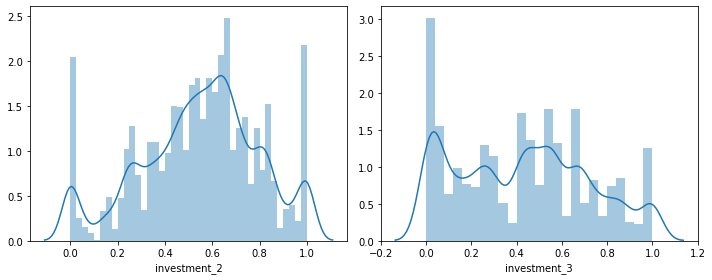

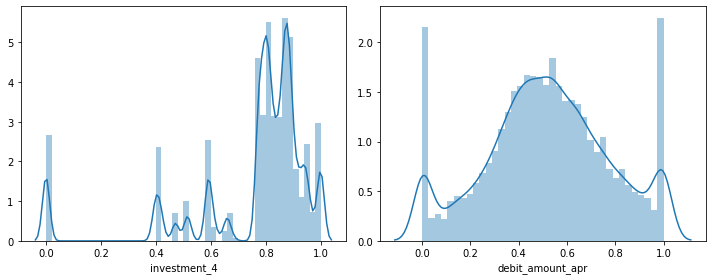

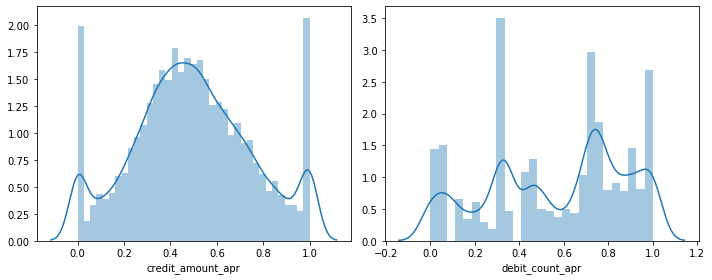

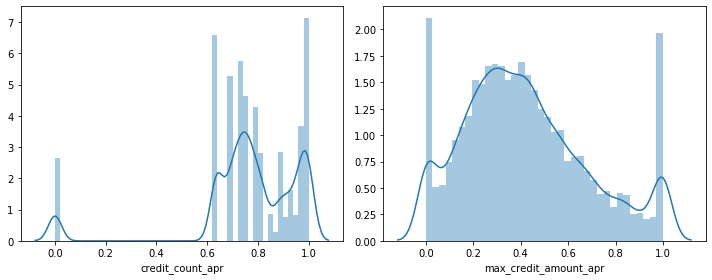

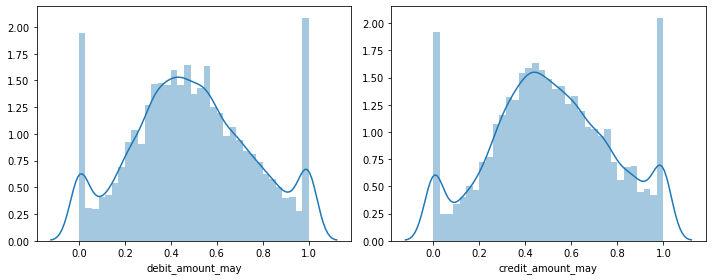

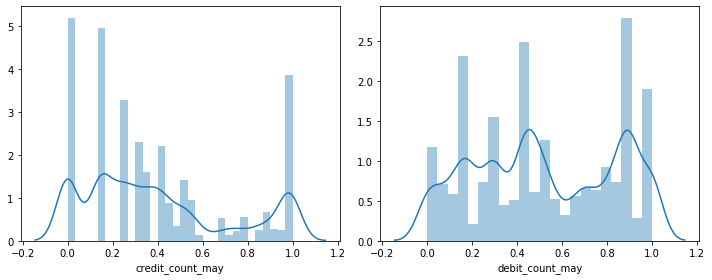

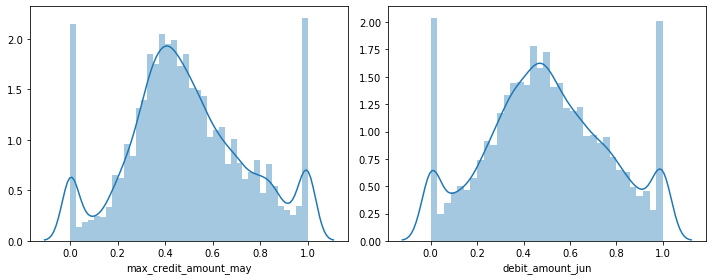

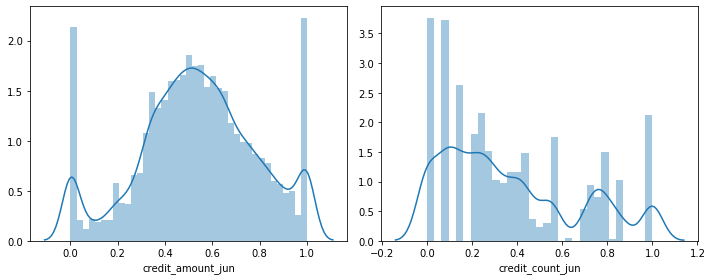

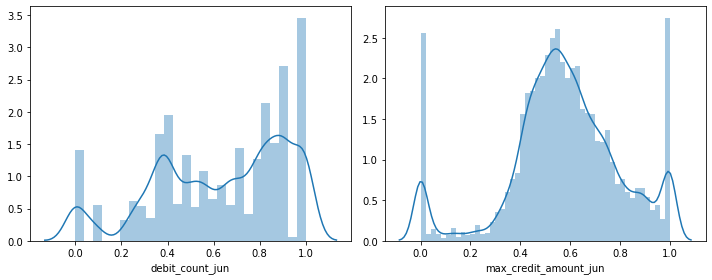

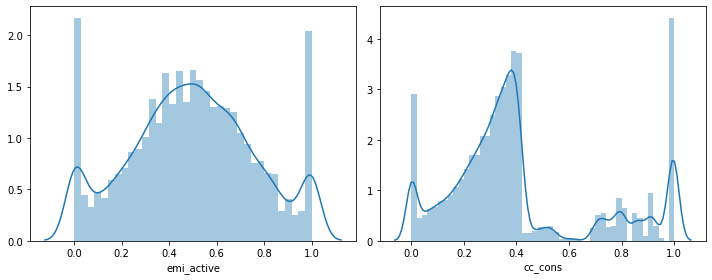

In [117]:
plot_distplots(scaled_dataset)

In [228]:
ohe = OneHotEncoder()
cat_features = dataset_without_zerovariance_cols.select_dtypes(include='object')
cat_features_ohe = ohe.fit_transform(cat_features).toarray()
cat_features_ohe = pd.DataFrame(cat_features_ohe,columns=['saving_account','current_acc','female','male'])
merged_dataset = pd.concat([cat_features_ohe,transformed_dataset],axis=1)
# merge_df.drop(cat_features.columns,axis=1,inplace=True)
merged_dataset.head()

,saving_account,current_acc,female,male,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,1.0,0.0,0.0,1.0,35.0,708,157.775156,19.442222,101.429779,172.232401,...,1.414214,40.0,156.725875,173.353166,112.964596,1.414214,65.0,225.468401,40.915645,141.470845
1,1.0,0.0,0.0,1.0,35.0,123,137.628558,31.080541,143.777606,16.941074,...,1.414214,78.0,154.751414,205.229262,152.400787,4.582576,63.0,152.400787,114.207443,100.861291
2,1.0,0.0,0.0,1.0,55.0,802,75.358278,52.191953,44.322680,62.714512,...,1.414214,82.0,103.691851,241.605567,164.426275,2.645751,1.0,164.426275,159.296171,126.866071
3,1.0,0.0,1.0,0.0,29.0,867,174.612428,35.156792,112.293722,95.593619,...,4.795832,38.0,112.280898,264.294362,207.453609,4.582576,83.0,207.453609,59.534276,87.789521
4,1.0,0.0,0.0,1.0,34.0,802,86.263550,83.102587,66.060578,44.034078,...,4.898979,50.0,158.786020,100.354372,179.008380,2.828427,32.0,179.008380,113.050608,310.496377


In [229]:
new_data_preprocessed_2 = merged_dataset.to_csv('../Data/new_data_preprocessed_2.csv',index=False)